In [2]:
import os, sys, json
src_path = os.path.abspath(os.path.join(".."))
if src_path not in sys.path:
    sys.path.append(src_path)

import numpy as np
import matplotlib.pyplot as plt
from src.image_processor import default_image_transform
from src.config import CaptionConfig
from src.data_loader import CaptionDataManager
from src.image_processor import train_transform

import torch
import torch.optim as optim

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
config_path = os.path.join(src_path, "src","config.yml") 
print(config_path)
assert(os.path.exists(config_path))

manager = CaptionDataManager(config_path)
print(manager)

/home/nsimsiri/Image-Captioning/src/config.yml
loading annotations into memory...
Done (t=0.64s)
creating index...
index created!
loaded - val captions








100%|██████████| 500/500 [00:00<00:00, 2452.77it/s]

Loaded {} samples 500


<start> a statue under an umbrella pointing to a fir tree on a red-tiled city square . <end>


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


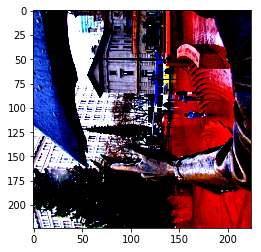

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<start> a man sitting at a table with a plate of food . <end> <pad> <pad> <pad> <pad>


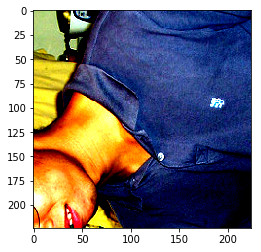

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<start> two double deckers buses travelling on a city street . <end> <pad> <pad> <pad> <pad> <pad> <pad>


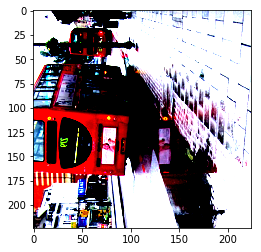

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<start> the older airplane is parked in the parking lot . <end> <pad> <pad> <pad> <pad> <pad> <pad>


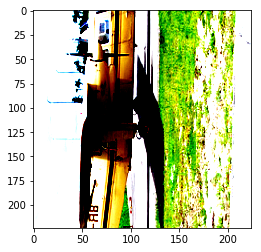

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<start> many busses drive down a busy street . <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>


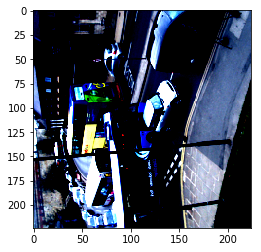

In [6]:
import sys

train_loader = manager.build_dataloader('train', 
                                        batch_size=5, 
                                        shuffle=True, 
                                        image_transform=train_transform)
print(train_loader)
for x in train_loader:
    annIds, imgs, caps, caplens = x
    for i in range(5):
        annId, img, cap, caplen = annIds[i], imgs[i], caps[i], caplens[i]
        print(manager.decode_tokens(cap.numpy().tolist(), length=caplen))
        img_np = np.swapaxes(img.numpy(), 2, 0)
        plt.imshow(img_np)
        plt.show()
    break
    
    

In [ ]:


# import torch
# import torch.nn as nn
# from torch.autograd import Variable

# batch_size = 3
# max_length = 3
# hidden_size = 2
# n_layers =1

# # container
# batch_in = torch.zeros((batch_size, 1, max_length))

# #data
# # vec_1 = torch.FloatTensor([[1, 2, 3]])
# # vec_2 = torch.FloatTensor([[1, 2, 0]])
# # vec_3 = torch.FloatTensor([[1, 0, 0]])

# # batch_in[0] = vec_1
# # batch_in[1] = vec_2
# # batch_in[2] = vec_3

# batch_in = torch.FloatTensor([[1,2,3],[1,2,0],[1,0,0]])
# print(batch_in.shape)

# # batch_in = Variable(batch_in)
# batch_in = batch_in.unsqueeze(2)
# print(batch_in.shape)

# seq_lengths = [3,2, # list of integers holding information about the batch size at each sequence step

# # pack it
# pack = torch.nn.utils.rnn.pack_padded_sequence(batch_in, seq_lengths, batch_first=True)
# print(pack.data.shape)

# # # initialize
# max_length = 1
# rnn = nn.RNN(max_length, hidden_size, n_layers, batch_first=True) 
# h0 = Variable(torch.randn(n_layers, batch_size, hidden_size))
# print(pack)
# # #forward 
# rnn(pack, h0)

# # # unpack
# # unpacked, unpacked_len = torch.nn.utils.rnn.pad_packed_sequence(out)



## PackedSequence Reference (new)

In [ ]:
# import torch
# from torch import LongTensor
# from torch.nn import Embedding, LSTM
# from torch.autograd import Variable
# from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# ## We want to run LSTM on a batch of 3 character sequences ['long_str', 'tiny', 'medium']
# #
# #     Step 1: Construct Vocabulary
# #     Step 2: Load indexed data (list of instances, where each instance is list of character indices)
# #     Step 3: Make Model
# #  *  Step 4: Pad instances with 0s till max length sequence
# #  *  Step 5: Sort instances by sequence length in descending order
# #  *  Step 6: Embed the instances
# #  *  Step 7: Call pack_padded_sequence with embeded instances and sequence lengths
# #  *  Step 8: Forward with LSTM
# #  *  Step 9: Call unpack_padded_sequences if required / or just pick last hidden vector
# #  *  Summary of Shape Transformations

# # We want to run LSTM on a batch following 3 character sequences
# seqs = ['long_str',  # len = 8
#         'tiny',      # len = 4
#         'medium']    # len = 6


# ## Step 1: Construct Vocabulary ##
# ##------------------------------##
# # make sure <pad> idx is 0
# vocab = ['<pad>'] + sorted(set([char for seq in seqs for char in seq]))
# # => ['<pad>', '_', 'd', 'e', 'g', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'y']


# ## Step 2: Load indexed data (list of instances, where each instance is list of character indices) ##
# ##-------------------------------------------------------------------------------------------------##
# vectorized_seqs = [[vocab.index(tok) for tok in seq]for seq in seqs]
# # vectorized_seqs => [[6, 9, 8, 4, 1, 11, 12, 10],
# #                     [12, 5, 8, 14],
# #                     [7, 3, 2, 5, 13, 7]]


# ## Step 3: Make Model ##
# ##--------------------##
# embed = Embedding(len(vocab), 4) # embedding_dim = 4
# lstm = LSTM(input_size=4, hidden_size=5, batch_first=True) # input_dim = 4, hidden_dim = 5


# ## Step 4: Pad instances with 0s till max length sequence ##
# ##--------------------------------------------------------##

# # get the length of each seq in your batch
# seq_lengths = LongTensor(list(map(len, vectorized_seqs)))
# # seq_lengths => [ 8, 4,  6]
# # batch_sum_seq_len: 8 + 4 + 6 = 18
# # max_seq_len: 8

# seq_tensor = Variable(torch.zeros((len(vectorized_seqs), seq_lengths.max()))).long()
# # seq_tensor => [[0 0 0 0 0 0 0 0]
# #                [0 0 0 0 0 0 0 0]
# #                [0 0 0 0 0 0 0 0]]

# for idx, (seq, seqlen) in enumerate(zip(vectorized_seqs, seq_lengths)):
#     seq_tensor[idx, :seqlen] = LongTensor(seq)
# # seq_tensor => [[ 6  9  8  4  1 11 12 10]          # long_str
# #                [12  5  8 14  0  0  0  0]          # tiny
# #                [ 7  3  2  5 13  7  0  0]]         # medium
# # seq_tensor.shape : (batch_size X max_seq_len) = (3 X 8)


# ## Step 5: Sort instances by sequence length in descending order ##
# ##---------------------------------------------------------------##

# seq_lengths, perm_idx = seq_lengths.sort(0, descending=True)
# seq_tensor = seq_tensor[perm_idx]
# # seq_tensor => [[ 6  9  8  4  1 11 12 10]           # long_str
# #                [ 7  3  2  5 13  7  0  0]           # medium
# #                [12  5  8 14  0  0  0  0]]          # tiny
# # seq_tensor.shape : (batch_size X max_seq_len) = (3 X 8)


# ## Step 6: Embed the instances ##
# ##-----------------------------##

# embedded_seq_tensor = embed(seq_tensor)
# # embedded_seq_tensor =>
# #                       [[[-0.77578706 -1.8080667  -1.1168439   1.1059115 ]     l
# #                         [-0.23622951  2.0361056   0.15435742 -0.04513785]     o
# #                         [-0.6000342   1.1732816   0.19938554 -1.5976517 ]     n
# #                         [ 0.40524676  0.98665565 -0.08621677 -1.1728264 ]     g
# #                         [-1.6334635  -0.6100042   1.7509955  -1.931793  ]     _
# #                         [-0.6470658  -0.6266589  -1.7463604   1.2675372 ]     s
# #                         [ 0.64004815  0.45813003  0.3476034  -0.03451729]     t
# #                         [-0.22739866 -0.45782727 -0.6643252   0.25129375]]    r

# #                        [[ 0.16031227 -0.08209462 -0.16297023  0.48121014]     m
# #                         [-0.7303265  -0.857339    0.58913064 -1.1068314 ]     e
# #                         [ 0.48159844 -1.4886451   0.92639893  0.76906884]     d
# #                         [ 0.27616557 -1.224429   -1.342848   -0.7495876 ]     i
# #                         [ 0.01795524 -0.59048957 -0.53800726 -0.6611691 ]     u
# #                         [ 0.16031227 -0.08209462 -0.16297023  0.48121014]     m
# #                         [ 0.2691206  -0.43435425  0.87935454 -2.2269666 ]     <pad>
# #                         [ 0.2691206  -0.43435425  0.87935454 -2.2269666 ]]    <pad>

# #                        [[ 0.64004815  0.45813003  0.3476034  -0.03451729]     t
# #                         [ 0.27616557 -1.224429   -1.342848   -0.7495876 ]     i
# #                         [-0.6000342   1.1732816   0.19938554 -1.5976517 ]     n
# #                         [-1.284392    0.68294704  1.4064184  -0.42879772]     y
# #                         [ 0.2691206  -0.43435425  0.87935454 -2.2269666 ]     <pad>
# #                         [ 0.2691206  -0.43435425  0.87935454 -2.2269666 ]     <pad>
# #                         [ 0.2691206  -0.43435425  0.87935454 -2.2269666 ]     <pad>
# #                         [ 0.2691206  -0.43435425  0.87935454 -2.2269666 ]]]   <pad>
# # embedded_seq_tensor.shape : (batch_size X max_seq_len X embedding_dim) = (3 X 8 X 4)


# ## Step 7: Call pack_padded_sequence with embeded instances and sequence lengths ##
# ##-------------------------------------------------------------------------------##

# packed_input = pack_padded_sequence(embedded_seq_tensor, seq_lengths.cpu().numpy(), batch_first=True)
# # packed_input (PackedSequence is NamedTuple with 2 attributes: data and batch_sizes
# #
# # packed_input.data =>
# #                         [[-0.77578706 -1.8080667  -1.1168439   1.1059115 ]     l
# #                          [ 0.01795524 -0.59048957 -0.53800726 -0.6611691 ]     m
# #                          [-0.6470658  -0.6266589  -1.7463604   1.2675372 ]     t
# #                          [ 0.16031227 -0.08209462 -0.16297023  0.48121014]     o
# #                          [ 0.40524676  0.98665565 -0.08621677 -1.1728264 ]     e
# #                          [-1.284392    0.68294704  1.4064184  -0.42879772]     i
# #                          [ 0.64004815  0.45813003  0.3476034  -0.03451729]     n
# #                          [ 0.27616557 -1.224429   -1.342848   -0.7495876 ]     d
# #                          [ 0.64004815  0.45813003  0.3476034  -0.03451729]     n
# #                          [-0.23622951  2.0361056   0.15435742 -0.04513785]     g
# #                          [ 0.16031227 -0.08209462 -0.16297023  0.48121014]     i
# #                          [-0.22739866 -0.45782727 -0.6643252   0.25129375]]    y
# #                          [-0.7303265  -0.857339    0.58913064 -1.1068314 ]     _
# #                          [-1.6334635  -0.6100042   1.7509955  -1.931793  ]     u
# #                          [ 0.27616557 -1.224429   -1.342848   -0.7495876 ]     s
# #                          [-0.6000342   1.1732816   0.19938554 -1.5976517 ]     m
# #                          [-0.6000342   1.1732816   0.19938554 -1.5976517 ]     t
# #                          [ 0.48159844 -1.4886451   0.92639893  0.76906884]     r
# # packed_input.data.shape : (batch_sum_seq_len X embedding_dim) = (18 X 4)
# #
# # packed_input.batch_sizes => [ 3,  3,  3,  3,  2,  2,  1,  1]
# # visualization :
# # l  o  n  g  _  s  t  r   #(long_str)
# # m  e  d  i  u  m         #(medium)
# # t  i  n  y               #(tiny)
# # 3  3  3  3  2  2  1  1   (sum = 18 [batch_sum_seq_len])


# ## Step 8: Forward with LSTM ##
# ##---------------------------##

# packed_output, (ht, ct) = lstm(packed_input)
# # packed_output (PackedSequence is NamedTuple with 2 attributes: data and batch_sizes
# #
# # packed_output.data :
# #                          [[-0.00947162  0.07743231  0.20343193  0.29611713  0.07992904]   l
# #                           [ 0.08596145  0.09205993  0.20892891  0.21788561  0.00624391]   o
# #                           [ 0.16861682  0.07807446  0.18812777 -0.01148055 -0.01091915]   n
# #                           [ 0.20994528  0.17932937  0.17748171  0.05025435  0.15717036]   g
# #                           [ 0.01364102  0.11060348  0.14704391  0.24145307  0.12879576]   _
# #                           [ 0.02610307  0.00965587  0.31438383  0.246354    0.08276576]   s
# #                           [ 0.09527554  0.14521319  0.1923058  -0.05925677  0.18633027]   t
# #                           [ 0.09872741  0.13324396  0.19446367  0.4307988  -0.05149471]   r
# #                           [ 0.03895474  0.08449443  0.18839942  0.02205326  0.23149511]   m
# #                           [ 0.14620507  0.07822411  0.2849248  -0.22616537  0.15480657]   e
# #                           [ 0.00884941  0.05762182  0.30557525  0.373712    0.08834908]   d
# #                           [ 0.12460691  0.21189159  0.04823487  0.06384943  0.28563985]   i
# #                           [ 0.01368293  0.15872964  0.03759198 -0.13403234  0.23890573]   u
# #                           [ 0.00377969  0.05943518  0.2961751   0.35107893  0.15148178]   m
# #                           [ 0.00737647  0.17101538  0.28344846  0.18878219  0.20339936]   t
# #                           [ 0.0864429   0.11173367  0.3158251   0.37537992  0.11876849]   i
# #                           [ 0.17885767  0.12713005  0.28287745  0.05562563  0.10871304]   n
# #                           [ 0.09486895  0.12772645  0.34048414  0.25930756  0.12044918]]  y
# # packed_output.data.shape : (batch_sum_seq_len X hidden_dim) = (18 X 5)

# # packed_output.batch_sizes => [ 3,  3,  3,  3,  2,  2,  1,  1] (same as packed_input.batch_sizes)
# # visualization :
# # l  o  n  g  _  s  t  r   #(long_str)
# # m  e  d  i  u  m         #(medium)
# # t  i  n  y               #(tiny)
# # 3  3  3  3  2  2  1  1   (sum = 18 [batch_sum_seq_len])




In [1]:
torch.device('cuda')

NameError: name 'torch' is not defined